In [1]:
import pandas as pd
# Load data from the Excel sheet
file_path = "/Users/elchulito/Library/CloudStorage/OneDrive-polymtl/PlasticFADE.xlsx"  # CHECK: confirm file path
sheet_name = "Fig.S2"

# Read and display the data
data = pd.read_excel(file_path, sheet_name=sheet_name)
print(data)

   UV index [-]  Annual UV irradiance [MJ/m2]    Region / Country
0             4                           200    Nordic Countries
1             5                           250      Central Europe
2             6                           300         New Zealand
3             7                           350   Republic of Korea
4             8                           400     Southeast China
5             9                           450    Republic of Cuba
6            10                           500  Northern Australia
7            11                           550      Central Africa


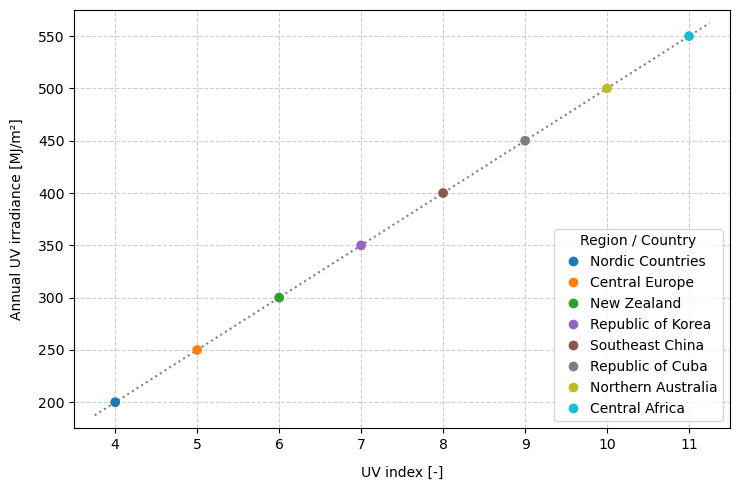

In [3]:
import matplotlib.pyplot as plt

# Extract columns from DataFrame
x = data["UV index [-]"]
y = data["Annual UV irradiance [MJ/m2]"]
labels = data["Region / Country"]

# Create a scatter plot with different colors for each region
plt.figure(figsize=(7.5, 5))
scatter = plt.scatter(x, y, c=range(len(labels)), cmap="tab10", zorder=3)

x_spacing = x.iloc[1] - x.iloc[0]   # assumes equal spacing in x
y_spacing = y.iloc[1] - y.iloc[0]   # assumes equal spacing in y

# Add dotted line connecting points (and extended across padded range)
plt.plot(
    [x.min() - x_spacing/4, x.max() + x_spacing/4],
    [y.min() - y_spacing/4, y.max() + y_spacing/4],
    linestyle=":", color="gray", zorder=2
)

# Adjust axis limits: add half the grid spacing on both sides
plt.xlim(x.min() - x_spacing/2, x.max() + x_spacing/2)
plt.ylim(y.min() - y_spacing/2, y.max() + y_spacing/2)

# Labels and grid
plt.xlabel("UV index [-]", labelpad=10)
plt.ylabel("Annual UV irradiance [MJ/m²]", labelpad=10)
plt.grid(True, linestyle="--", alpha=0.6)

# Add legend mapping colors to regions
handles, _ = scatter.legend_elements()
plt.legend(handles, labels, title="Region / Country", loc="lower right", handletextpad=0.2)

plt.savefig("/Users/elchulito/Fig.S2.png", dpi=600, bbox_inches='tight')  # CHECK: confirm name and desired place for the plot
plt.tight_layout()
plt.show()